### Script to
1. get count of pairs with label DW/DNW/H/R per dataset
2. get the %age of pairs which har H/R in one data while DNW in another in CCLE and GDSC
3. Check if Hump and rising curves are outliers (to be removed) or is it the property of some dr/cl BY PLOTTING A CONTINGENCY TABLE to see how many pairs are H/R in both datastes 

###### **NOTE: this script used dose response files in the old format : cl,dr have dataset specific names, 1 row for 1 pair not 1 doasge

In [24]:
__author__ = 'Aanchal'

In [25]:
import pandas as pd
import numpy as np
import FUNCTIONS as f
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import FUNCTIONS as f

import warnings
warnings.filterwarnings('ignore')

In [26]:
Intersection_ic50=pd.read_csv('../data_processed/CurveCategoryDetection/Intersection_withCurveCategory_SplitNormalUsingIC50.csv')


In [27]:
#3 categories
Intersection_ic50['ccle_category'].value_counts()

1.0    1742
2.0    1190
4.0      54
3.0      18
Name: ccle_category, dtype: int64

In [28]:
#using IC50
Intersection_ic50['gdsc_category'].value_counts()

1.0    2119
2.0     773
4.0      80
3.0      32
Name: gdsc_category, dtype: int64

#### To get the %age of pairs which har H/R in one data while DNW in another in CCLE and GDSC

In [29]:
#ccle
noh=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==3) ] )
nor=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==4) ] )
hNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==3) & (Intersection_ic50['gdsc_category']==1)  ] )
rNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['ccle_category']==4) & (Intersection_ic50['gdsc_category']==1)  ])
perc_hNdnw=hNdnw/noh #82.35
perc_rNdnw=rNdnw/nor #88.67


#gdsc
noh=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==3) ] )
nor=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==4) ] )
hNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==3) & (Intersection_ic50['ccle_category']==1)  ] )
rNdnw=len( Intersection_ic50.loc [ (Intersection_ic50['gdsc_category']==4) & (Intersection_ic50['ccle_category']==1)  ])
perc_hNdnw=hNdnw/noh #90.32
perc_rNdnw=rNdnw/nor #81.81
perc_hNdnw

0.90625

##### CONTINGENCY MATRIX- Along rows: CCLE, Along cols: GDSE (slightly diff from before bcz label 2 (DW) given only to pairs which have label 1 (DW o DNW) and not to either of 1/3/4)

Confusion matrix, without normalization
[[1468  179   29   66]
 [ 588  589    3   10]
 [  15    1    0    2]
 [  48    4    0    2]]


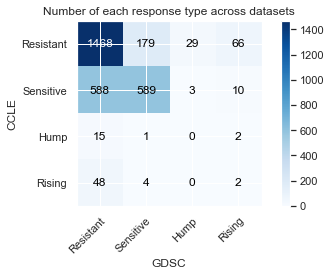

In [30]:
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
f.plot_confusion_matrix(Intersection_ic50['ccle_category'],Intersection_ic50['gdsc_category'],classes=[1,2,3,4],title='Number of each response type across datasets')


plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/contingency_matrix.svg')
plt.savefig('../figures/CheckOutlierBeahviourAcrossDatasets/contingency_matrix.png')
plt.show()

In [31]:
table=pd.crosstab(Intersection_ic50['ccle_category'],Intersection_ic50['gdsc_category'])
table

gdsc_category,1.0,2.0,3.0,4.0
ccle_category,,,,
1.0,1468,179,29,66
2.0,588,589,3,10
3.0,15,1,0,2
4.0,48,4,0,2


In [32]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

2.253639715888704e-123

#### Restricting to pairs with atleast 1 H/R

In [33]:
shapeno=3 #hump
df= Intersection_ic50[(Intersection_ic50['ccle_category']==shapeno) | (Intersection_ic50['gdsc_category']==shapeno)]
df=df[(df['ccle_category']==1) | (df['gdsc_category']==1)]
df
table=pd.crosstab(df['ccle_category'],df['gdsc_category'])
(table)

gdsc_category,1.0,3.0
ccle_category,,
1.0,0,29
3.0,15,0


In [34]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

3.019485805333335e-10

In [35]:
df=df.rename(columns={'Cell_line_name':'Standard cell line name','Drug _Name':'Standard drug name'})  
[dic_cl_ccle,dic_dr_ccle]=f.getDictionary('CCLE',1)
df=df.replace(dic_cl_ccle)
df=df.replace(dic_dr_ccle)
df
df['_label']=0*len(df)

In [36]:
if (shapeno==3):
    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1hump_plots/', '', '','', 0, df)
elif(shapeno==4):    
    f.copyPastePlots('../figures/FittedCurves_commonPairs_plots/', '../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1rising_plots/', '', '','', 0, df)

curves saved in folder:  ../figures/CheckOutlierBeahviourAcrossDatasets/FittedCurves_commonPairs_atleast1hump_plots//_k=0


-0.21

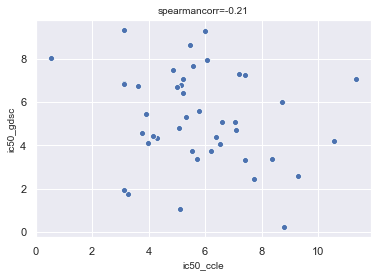

In [37]:
df=f.get_ic50s_asFeatures(df)
f.plotVectorsGetCorr_seaborn('ic50_ccle','ic50_gdsc',df,'spearman' )

In [38]:
df

,Standard cell line name,Standard drug name,ccle_category,gdsc_category,_label,ic50_ccle,ic50_gdsc
4,A673,PD0325901,1.0,3.0,0,5.116478,1.068451
36,SW780,PLX-4720,3.0,1.0,0,7.087993,4.731283
54,8-MG-BA,Nutlin-3a,3.0,1.0,0,3.606456,6.734589
152,NCI-H1693,Selumetinib,3.0,1.0,0,5.159877,6.800738
165,NCI-H661,Selumetinib,1.0,3.0,0,7.406007,3.314639
196,NCI-H1092,Nilotinib,3.0,1.0,0,5.704286,3.390402
210,NCI-H1694,Lapatinib,3.0,1.0,0,7.732332,2.453948
318,NCI-H1355,PHA-665752,1.0,3.0,0,6.064965,7.954046
552,PC-3,PLX-4720,1.0,3.0,0,3.760445,4.554760
554,PC-3,Palbociclib,1.0,3.0,0,8.797610,0.200583


#### To count the common pairs showing similar behaviour (hump or rising) in both datasets

In [39]:
table=pd.crosstab(Intersection_ic50['ccle_category'].replace({3:0,4:0, 2:1}),Intersection_ic50['gdsc_category'].replace({3:0,4:0,  2:1}))
table

gdsc_category,0.0,1.0
ccle_category,,
0.0,4,68
1.0,108,2824


In [40]:
[chi2,p,dof,expected]=chi2_contingency(table)
p

0.6075857232186828